In [1]:
import pandas as pd

In [2]:
dfHist = pd.read_csv('./aapl.csv')
dfHist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
Date      251 non-null object
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


In [3]:
index = [i for i in range(251, 0, -1)]
dfData = pd.DataFrame(dfHist.Open)
dfData.index = index
dfData.index.names = ['Index']
dfData = dfData.iloc[::-1]
dfData.reset_index(level = 0, inplace  = True)
print(dfData)

     Index    Open
0        1   96.82
1        2  104.26
2        3  102.83
3        4  104.19
4        5  104.41
5        6  106.05
6        7  104.81
7        8  105.58
8        9  106.27
9       10  107.52
10      11  108.23
11      12  108.71
12      13  108.52
13      14  107.78
14      15  108.14
15      16  109.63
16      17  109.10
17      18  109.23
18      19  108.77
19      20  108.86
20      21  108.59
21      22  108.56
22      23  107.39
23      24  107.41
24      25  106.62
25      26  105.80
26      27  105.66
27      28  106.14
28      29  107.70
29      30  107.90
..     ...     ...
221    222  145.74
222    223  147.16
223    224  147.50
224    225  143.32
225    226  143.78
226    227  143.66
227    228  146.87
228    229  145.52
229    230  145.77
230    231  145.13
231    232  147.17
232    233  145.01
233    234  144.49
234    235  144.71
235    236  144.45
236    237  144.88
237    238  143.69
238    239  143.02
239    240  142.90
240    241  144.11
241    242  

In [4]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
X = dfData[['Index']]
y = dfData[['Open']].values.ravel()

svr_rbf.fit(X, y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

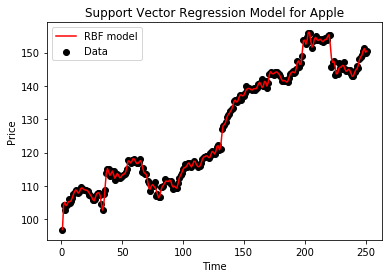

In [6]:
plt.scatter(X, y, color = 'black', label = 'Data')
plt.plot(X, svr_rbf.predict(X), color = 'red', label = 'RBF model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Support Vector Regression Model for Apple')

In [7]:
print('Apple stock price for tomorrow:', svr_rbf.predict(252)[0])

Apple stock price for tomorrow: 154.146691171
